In [1]:
### Packages
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 한글 표시
plt.rcParams['font.family'] = "Gulim" 

In [12]:
### 영상 출력 함수
def fn_imshow(img, axis='off'):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    if axis=='off': plt.axis('off')
    plt.show()

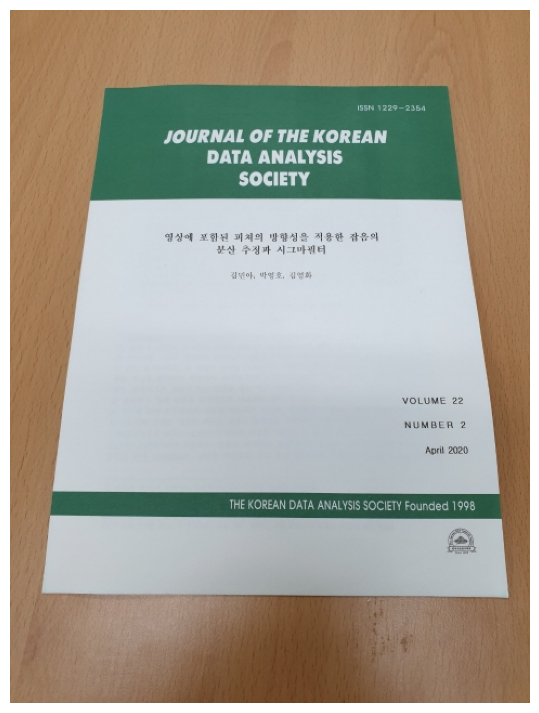

In [13]:
### 영상 읽기
img_raw = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\Image Process\paperresize.jpg")
fn_imshow(img_raw)

In [14]:
### 영상의 크기
img_raw.shape

(640, 480, 3)

In [15]:
### 좌표 출력
def fn_mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print("Double click, [ x , y ]:[", x ,",", y,"]")

In [17]:
### 영상 출력 - Display an image in an OpenCV window
win_name = "Display window"
cv2.imshow(win_name, img_raw)
cv2.setMouseCallback(win_name, fn_mouse_callback)
cv2.waitKey(0)
cv2.destroyAllWindows()

Double click, [ x , y ]:[ 88 , 72 ]
Double click, [ x , y ]:[ 405 , 72 ]
Double click, [ x , y ]:[ 30 , 539 ]
Double click, [ x , y ]:[ 462 , 543 ]


In [32]:
### 영상의 크기
height, width = img_raw.shape[:2]
### 소스 이미지의 사각형 꼭짓점 좌표
src_interest_pts = np.float32([[ 88 , 72 ],
                                [ 405 , 72 ],
                                [ 460 , 539 ],
                                [ 30 , 535 ]])
### 대상 이미지에서 해당하는 사각형 꼭짓점의 좌표
Projective_interest_pts = np.float32([[0,0],
                                        [width,0],
                                        [width,height],
                                        [0,height]])
### 워핑(Warping)
M = cv2.getPerspectiveTransform(src_interest_pts ,Projective_interest_pts)
img_warp = cv2.warpPerspective(img_raw, M, (width, height))

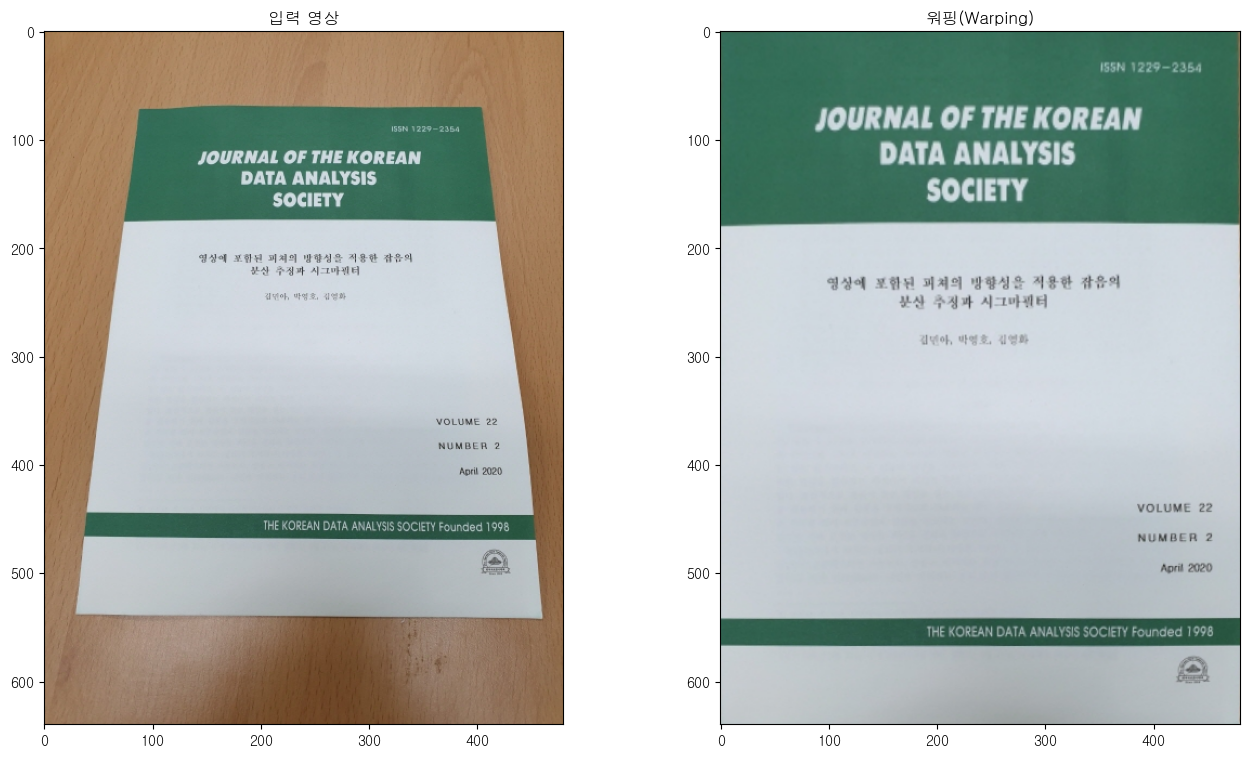

In [33]:
### 영상 출력
titles = ["입력 영상", "워핑(Warping)"]
images = [img_raw, img_warp]
for i in range(len(images)):
    plt.subplot(1, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    #plt.axis('off')
plt.show()

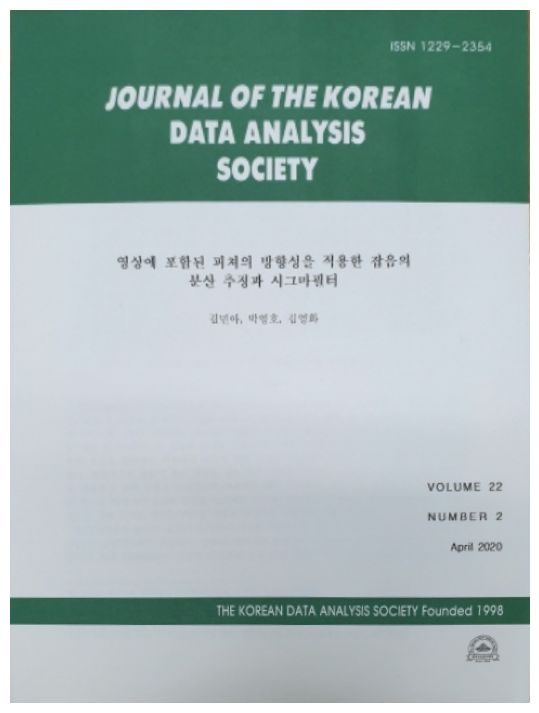

In [34]:
fn_imshow(img_warp)